
# House Predictor (Multiple feature)
This is a basic project which can predict house prices using linear regression

First lets import the libraries

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Making the cost function

In [115]:
def compute_cost(X, y, w, b):
    cost = 0
    m = X.shape[0]
    n = X.shape[1]

    for i in range(m):
        cost += (((np.dot(w, X[i]) + b) - y[i]) ** 2)

    return cost / (2 * m)

Gradient Descent time!!

In [116]:
def gradient_descent(X, y, w=None, b=0, alpha=0.1, iterations=1000):
    m = X.shape[0]
    n = X.shape[1]

    if w == None:
        w = np.zeros(n)

    for iteration in range(iterations):
        dj_dw = np.zeros(n)
        dj_db = 0
        # Computing gradients
        for i in range(m):
            cost = (np.dot(w, X[i]) + b) - y[i]

            dj_dw += cost * X[i]
            dj_db += cost
        dj_dw, dj_db = dj_dw / m, dj_db / m

        w -= (alpha * dj_dw)
        b -= (alpha * dj_db)

    return w, b

Now lets code the data we gonna train the model with

In [117]:
data = {
    "House Size": [10, 20, 30, 40, 70],
    "price": [100, 200, 350, 600, 1000]
}

df = pd.DataFrame(data)

X = np.array(df['House Size'])
X = np.column_stack((X, X ** 2, X ** 3, X ** 4))
y = np.array(df['price'])

# Scaling X and y
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y_scaled = (y - np.mean(y, axis=0)) / np.std(y, axis=0)

print(X_scaled, y_scaled)

[[-1.16554303 -0.85254814 -0.67872643 -0.59176401]
 [-0.6799001  -0.67973433 -0.6244903  -0.57562499]
 [-0.19425717 -0.39171131 -0.47727795 -0.50568924]
 [ 0.29138576  0.01152092 -0.19060126 -0.3174007 ]
 [ 1.74831455  1.91247286  1.97109594  1.99047894]] [-1.08530393 -0.77521709 -0.31008684  0.46513025  1.7054776 ]


Now lets train the model with the data

In [118]:
w, b = gradient_descent(X_scaled, y_scaled, b=0, alpha=1e-1, iterations=10000)
print(w, b)

[ 0.2011622   1.58081941  0.39192536 -1.22365027] 1.0880185641326551e-16


Now let's visualize the models predictions

[[      10      100     1000    10000]
 [      20      400     8000   160000]
 [      30      900    27000   810000]
 [      40     1600    64000  2560000]
 [      70     4900   343000 24010000]]
[ 0.2011622   1.58081941  0.39192536 -1.22365027] 1.0880185641326551e-16


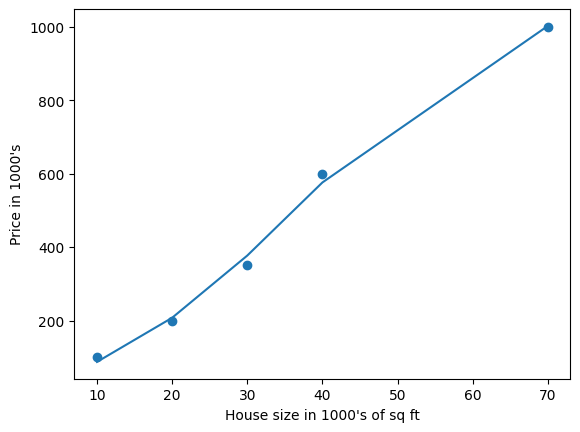

In [119]:
m = X.shape[0]

y_pred = np.dot(X_scaled, w) + b
y_pred_unscaled = y_pred * np.std(y) + np.mean(y)

plt.scatter(X[:, 0], y)
plt.xlabel("House size in 1000's of sq ft")
plt.ylabel("Price in 1000's")
plt.plot(X[:, 0], y_pred_unscaled)
print(X)
print(w, b)